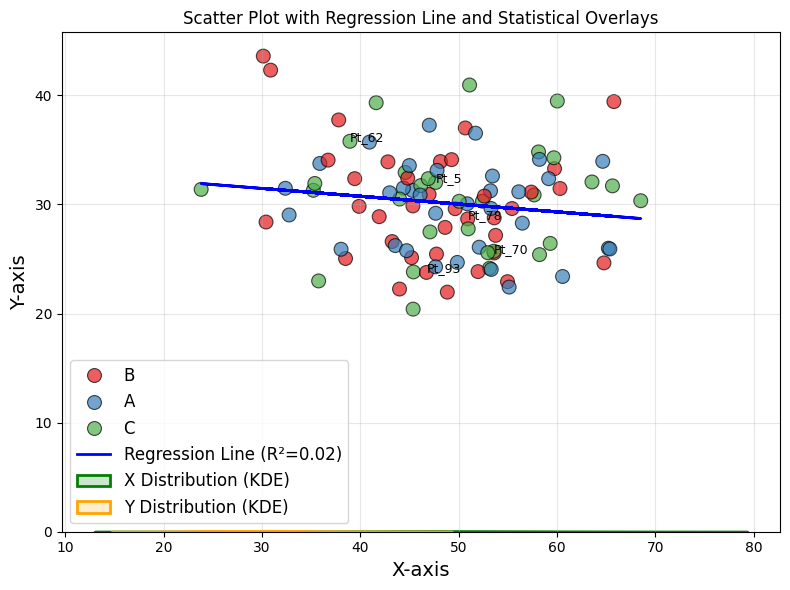

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Create a sample dataset
np.random.seed(42)
data = {
    "X": np.random.normal(50, 10, 100),
    "Y": np.random.normal(30, 5, 100),
    "Category": np.random.choice(['A', 'B', 'C'], size=100),
    "Label": [f"Pt_{i}" for i in range(100)]
}
df = pd.DataFrame(data)

# Compute regression line
slope, intercept, r_value, p_value, std_err = linregress(df['X'], df['Y'])
df['Predicted_Y'] = slope * df['X'] + intercept

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for categories
sns.scatterplot(data=df, x='X', y='Y', hue='Category', palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Add regression line
plt.plot(df['X'], df['Predicted_Y'], color='blue', linewidth=2, label=f"Regression Line (R²={r_value**2:.2f})")

# Annotate specific points (e.g., outliers or interesting points)
highlighted_points = df.sample(5)  # Highlight 5 random points
for i, row in highlighted_points.iterrows():
    plt.text(row['X'], row['Y'], row['Label'], fontsize=9, color='black')

# Overlay KDE (Kernel Density Estimation) plot
sns.kdeplot(df['X'], color='green', linewidth=2, label='X Distribution (KDE)', fill=True, alpha=0.2)
sns.kdeplot(df['Y'], color='orange', linewidth=2, label='Y Distribution (KDE)', fill=True, alpha=0.2)

# Add titles and labels
plt.title('Scatter Plot with Regression Line and Statistical Overlays', fontsize=12)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()
